In [142]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict
from sklearn.metrics import confusion_matrix
from scikitplot.metrics import plot_roc

from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [143]:
from sklearn.metrics import make_scorer, accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score, precision_recall_curve
from scikitplot.metrics import plot_roc
from sklearn.metrics import confusion_matrix

from sklearn.datasets import make_classification
from sklearn.preprocessing import label_binarize

load paa oroginale e ridotto

In [144]:
def load_npy(filename):
    return np.load(filename)

In [145]:
# reload 
X_y_ids = load_npy(r'C:\Users\HUAWEI\Desktop\DM2\project NEW\output_data\X_y_ids.npz') 
X, y, ids = X_y_ids['arr_0'], X_y_ids['arr_1'], X_y_ids['arr_2']

In [146]:
X = X.squeeze()
X.shape

(10000, 1280)

In [147]:
def moving_average_smoothing(series, window_size):
    """
    Perform moving average smoothing on a single time series.
    
    series: Input time series as a 1-dimensional numpy array.
    window_size: Size of the moving window as an integer.
    
    Returns the smoothed time series.
    """
    window = np.ones(window_size) / window_size
    smoothed_series = np.convolve(series, window, mode='same')
    return smoothed_series

w = 10

for i,time_series in enumerate(X):
    X[i]= moving_average_smoothing(X[i], w)

X

array([[2130.88561879, 2568.33847912, 2990.23072209, ..., 2899.11706832,
        2485.51636607, 2034.00475033],
       [ 679.07147931,  823.01094621,  967.67867224, ..., 2350.51603771,
        2255.94663986, 2013.19705516],
       [ 318.45578681,  382.25368168,  440.25811813, ...,  458.52318264,
         393.34486986,  333.33402451],
       ...,
       [1200.86391481, 1440.61160494, 1685.62806506, ..., 1731.9927237 ,
        1582.90566774, 1377.17148207],
       [ 143.65374605,  173.49937904,  203.52686126, ...,  225.28276079,
         196.41130282,  167.8707622 ],
       [ 171.56310082,  202.61136477,  233.17457589, ...,  262.40801895,
         231.25356842,  199.92540152]])

In [148]:
#temporaneo 
from tslearn.preprocessing import TimeSeriesScalerMeanVariance


X = TimeSeriesScalerMeanVariance().fit_transform(X)
print(X.shape)
X = X.squeeze()
print(X.shape)

(10000, 1280, 1)
(10000, 1280)


In [149]:
df = pd.DataFrame(np.squeeze(X))
df["genre"] = y

In [150]:
# Assegna la variabile target
y = df.iloc[:, -1].values

# Assegna il resto dei valori a X escludendo l'ultima colonna
X = df.iloc[:, :-1].values
X.shape, y.shape

((10000, 1280), (10000,))

In [151]:
from pyts.approximation import PiecewiseAggregateApproximation
from tslearn.piecewise import SymbolicAggregateApproximation
from pyts.approximation import DiscreteFourierTransform

print(X.shape)
#-------------------------#-------------------------
window_size = 4
paa = PiecewiseAggregateApproximation(window_size=window_size)
X_paa = paa.transform(X)
print(X_paa.shape)

# #-------------------------#-------------------------
# ## SAX with 50 symbols and 500 segments - erano quelli che plottando la TS davano risultato migliore
# n_sax_symbols = 10
# sax = SymbolicAggregateApproximation(n_segments=500, alphabet_size_avg=n_sax_symbols, scale=True)
# X_sax = sax.fit_transform(X)
# X_sax = X_sax.squeeze()
# print(X_sax.shape)

# #-------------------------#-------------------------
# n_coefs = 64
# dft = DiscreteFourierTransform(n_coefs=n_coefs)
# X_dft = dft.fit_transform(X)
# print(X_dft.shape)

(10000, 1280)
(10000, 320)


In [152]:
X_paa.shape, y.shape

((10000, 320), (10000,))

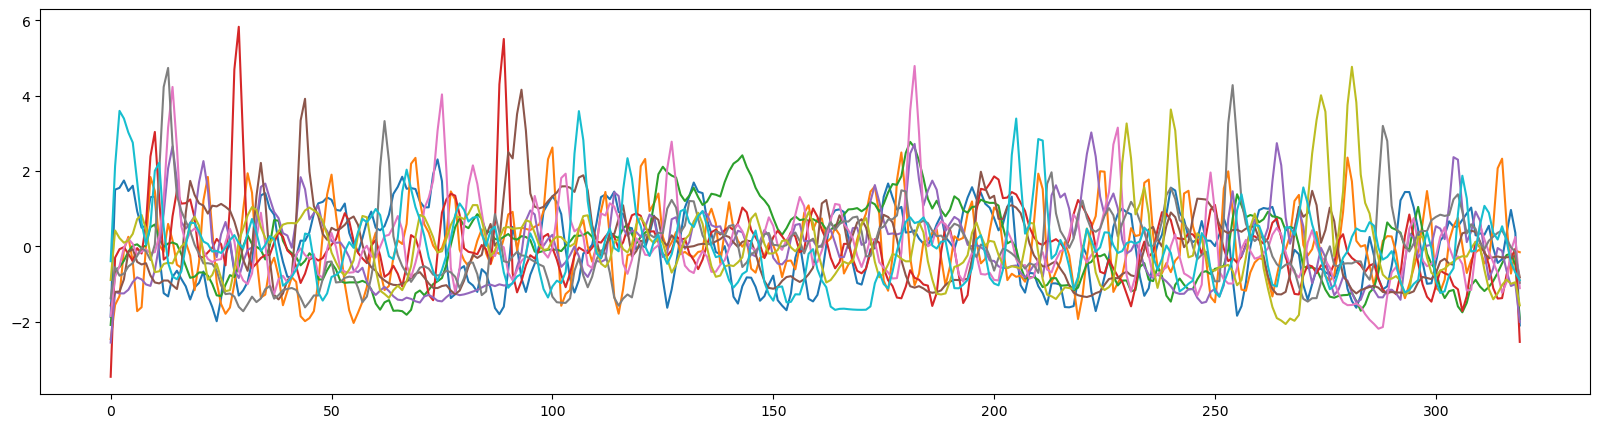

In [153]:
# plot the audio wave
plt.figure(figsize=(20,5))

for ts in X_paa[:10]:
  plt.plot(ts)

plt.show()


SPLIT

In [154]:
X_train, X_test, y_train, y_test = train_test_split(
    X_paa, y, test_size=0.2, random_state=42, stratify=y
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 320), (2000, 320), (8000,), (2000,))

# Classificatore di base: dummyclassifier

parto con un classificatore dummy per avere un punto di partenza con cui poter cofrontare i risultati che ottengo successivamente 

In [155]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train)

y_pred=dummy_clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.05
F1-score [0.0952381 0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.       ]
                   precision    recall  f1-score   support

              emo       0.05      1.00      0.10       100
             folk       0.00      0.00      0.00       100
             goth       0.00      0.00      0.00       100
            happy       0.00      0.00      0.00       100
      heavy-metal       0.00      0.00      0.00       100
       honky-tonk       0.00      0.00      0.00       100
           j-idol       0.00      0.00      0.00       100
             kids       0.00      0.00      0.00       100
   minimal-techno       0.00      0.00      0.00       100
              mpb       0.00      0.00      0.00       100
          new-age       0.00      0.00      0.00       100
            opera       0.00      0.00      0.00       100
            piano  

c:\Users\HUAWEI\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HUAWEI\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HUAWEI\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [156]:
X_train.shape, y_train.shape

((8000, 320), (8000,))

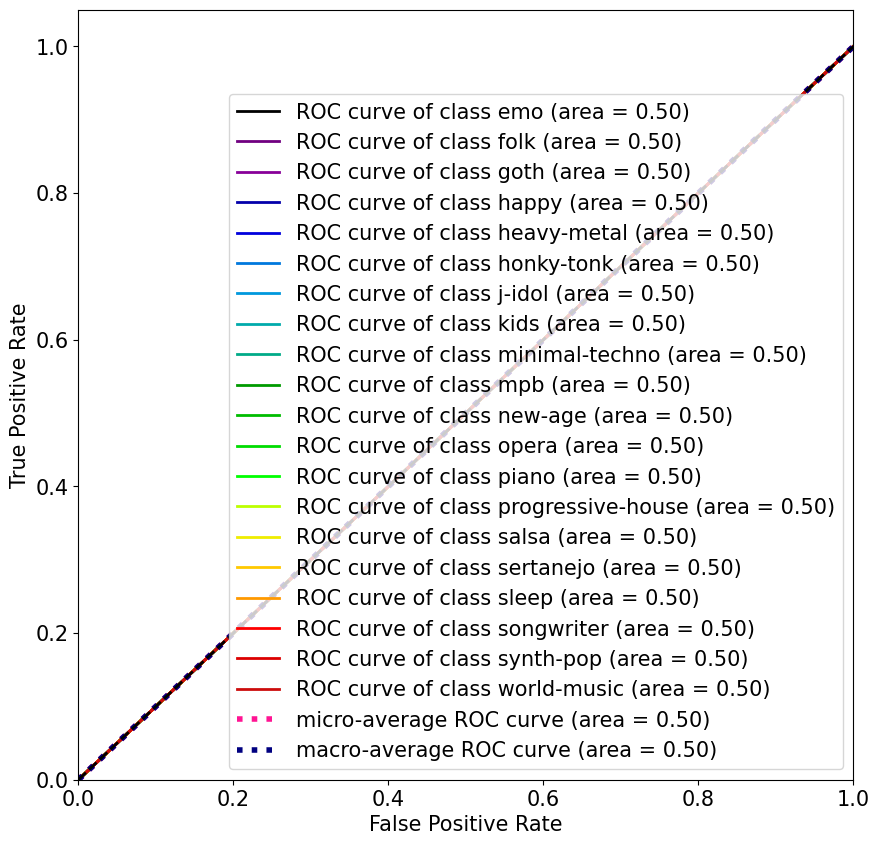

array([[100,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [100,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [100,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [100,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [100,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [100,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [100,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [100,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [100,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  

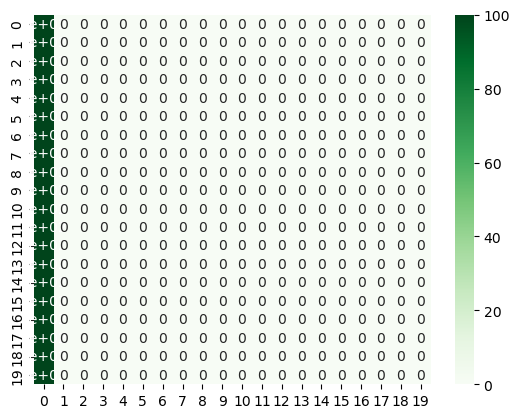

In [157]:
# ROC Curve
y_score_dummy = dummy_clf.predict_proba(X_test)
plot_roc(y_test, y_score_dummy, figsize=(10,10), title_fontsize=15, text_fontsize=15)
plt.title("")
plt.show()

#confusion matrix
cm_dummy = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_dummy, annot=True, cmap="Greens")
cm_dummy

# Shaplet Classifiers

A shapelet is a subsequence of a time series which is highly discriminative to recognise among different classes.

### 1. Brute Force Approach - non importa eseguirlo, ho fatto il dummy perchè ci mette tanto ad eseguire il codice 

In [158]:
'''
from pyts.transformation import ShapeletTransform

# Shapelet transformation
st = ShapeletTransform(window_sizes="auto",
                       random_state=42, sort=True)
X_new = st.fit_transform(X_train, y_train)
X_test_new = st.transform(X_test)

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=8, random_state=42)
clf.fit(X_new, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
'''


'\nfrom pyts.transformation import ShapeletTransform\n\n# Shapelet transformation\nst = ShapeletTransform(window_sizes="auto",\n                       random_state=42, sort=True)\nX_new = st.fit_transform(X_train, y_train)\nX_test_new = st.transform(X_test)\n\nfrom sklearn.tree import DecisionTreeClassifier\nclf = DecisionTreeClassifier(max_depth=8, random_state=42)\nclf.fit(X_new, y_train)\n\ny_pred = clf.predict(X_test)\n\nprint(\'Accuracy %s\' % accuracy_score(y_test, y_pred))\nprint(\'F1-score %s\' % f1_score(y_test, y_pred, average=None))\nprint(classification_report(y_test, y_pred))\n'

lo devo eseguire perchè ci vuole tanto tempo: 

### 2. Learning-based Approach


In [159]:
from keras.optimizers import Adagrad
from tslearn.shapelets import ShapeletModel
from tslearn.shapelets import grabocka_params_to_shapelet_size_dict

In [160]:
# numero ts and grandezza come quella di X train
n_ts, ts_sz = X_train.shape
# numero di classi, quelle della variabile target emotion
n_classes = len(set(y_train))

# Set the number of shapelets per size as done in the original paper
shapelet_sizes = grabocka_params_to_shapelet_size_dict(n_ts=n_ts,
                                                       ts_sz=ts_sz,
                                                       n_classes=n_classes,
                                                       l= 0.1,
                                                       r= 1)

print('n_ts', n_ts)
print('ts_sz', ts_sz)
print('n_classes', n_classes)
print('shapelet_sizes', shapelet_sizes)

n_ts 8000
ts_sz 320
n_classes 20
shapelet_sizes {32: 7}


In [119]:
from sklearn.model_selection import GridSearchCV
from tslearn.shapelets import ShapeletModel

# Definire i parametri da esplorare
param_grid = {
    'optimizer': ['sgd', 'adam'],
    'weight_regularizer': [0.01, 0.1],
    'max_iter': [100, 200],
}

# Inizializzare il classificatore Shapelet
shp_clf = ShapeletModel(n_shapelets_per_size=shapelet_sizes)

# Creare l'oggetto GridSearchCV
grid_search = GridSearchCV(shp_clf, param_grid, cv=3, scoring='accuracy')

# Eseguire la grid search sui dati di addestramento
grid_search.fit(X_train, y_train)

# Stampare i migliori parametri trovati
print("Migliori parametri:", grid_search.best_params_)

# Stampare l'accuratezza ottenuta con i migliori parametri
print("Accuratezza con migliori parametri:", grid_search.best_score_)


c:\Users\HUAWEI\anaconda3\Lib\site-packages\tslearn\shapelets\shapelets.py:354: FutureWarning: The default value for 'scale' is set to False in version 0.4 to ensure backward compatibility, but is likely to change in a future version.
  warnings.warn("The default value for 'scale' is set to False "
c:\Users\HUAWEI\anaconda3\Lib\site-packages\tslearn\shapelets\shapelets.py:354: FutureWarning: The default value for 'scale' is set to False in version 0.4 to ensure backward compatibility, but is likely to change in a future version.
  warnings.warn("The default value for 'scale' is set to False "
c:\Users\HUAWEI\anaconda3\Lib\site-packages\tslearn\shapelets\shapelets.py:354: FutureWarning: The default value for 'scale' is set to False in version 0.4 to ensure backward compatibility, but is likely to change in a future version.
  warnings.warn("The default value for 'scale' is set to False "
c:\Users\HUAWEI\anaconda3\Lib\site-packages\tslearn\shapelets\shapelets.py:354: FutureWarning: The d

Migliori parametri: {'max_iter': 200, 'optimizer': 'adam', 'weight_regularizer': 0.01}
Accuratezza con migliori parametri: 0.12962431646531805


<b>shapelet_sizes</b>: Questo è un dizionario che indica il numero di shapelet da estrarre per ciascuna lunghezza di shapelet. I shapelet sono sottosequenze significative delle serie temporali che possono aiutare nel processo di classificazione.

Abbiamo quindi ottenuto per una lunghezza di shapelets pari a x, stiamo cercando di estrarre x shapelets.

In [161]:
# Build the model based on what we established before   quali valori ??

#Define the model using parameters provided by the authors (except that we use fewer iterations here)
shp_clf = ShapeletModel(n_shapelets_per_size=shapelet_sizes,
                        optimizer="adam",
                        weight_regularizer=0.01,
                        max_iter=200,
                        verbose=1)

shp_clf

c:\Users\HUAWEI\anaconda3\Lib\site-packages\tslearn\shapelets\shapelets.py:354: FutureWarning: The default value for 'scale' is set to False in version 0.4 to ensure backward compatibility, but is likely to change in a future version.
  warnings.warn("The default value for 'scale' is set to False "


LearningShapelets(max_iter=200, n_shapelets_per_size={32: 7}, optimizer='adam',
                  verbose=1, weight_regularizer=0.01)

In [162]:
# Addestriamo il modello sugli shapelets estratti dal training set
shp_clf.fit(X_train, y_train)

Epoch 1/200
32/32 [==============================] - 2s 17ms/step - loss: 3.1116 - categorical_accuracy: 0.0515 - categorical_crossentropy: 3.0109
Epoch 2/200
32/32 [==============================] - 0s 13ms/step - loss: 3.0862 - categorical_accuracy: 0.0524 - categorical_crossentropy: 2.9999
Epoch 3/200
32/32 [==============================] - 0s 12ms/step - loss: 3.0665 - categorical_accuracy: 0.0525 - categorical_crossentropy: 2.9926
Epoch 4/200
32/32 [==============================] - 0s 12ms/step - loss: 3.0509 - categorical_accuracy: 0.0534 - categorical_crossentropy: 2.9875
Epoch 5/200
32/32 [==============================] - 0s 12ms/step - loss: 3.0383 - categorical_accuracy: 0.0532 - categorical_crossentropy: 2.9839
Epoch 6/200
32/32 [==============================] - 0s 15ms/step - loss: 3.0278 - categorical_accuracy: 0.0547 - categorical_crossentropy: 2.9810
Epoch 7/200
32/32 [==============================] - 0s 13ms/step - loss: 3.0192 - categorical_accuracy: 0.0566 - cate

LearningShapelets(max_iter=200, n_shapelets_per_size={32: 7}, optimizer='adam',
                  verbose=1, weight_regularizer=0.01)

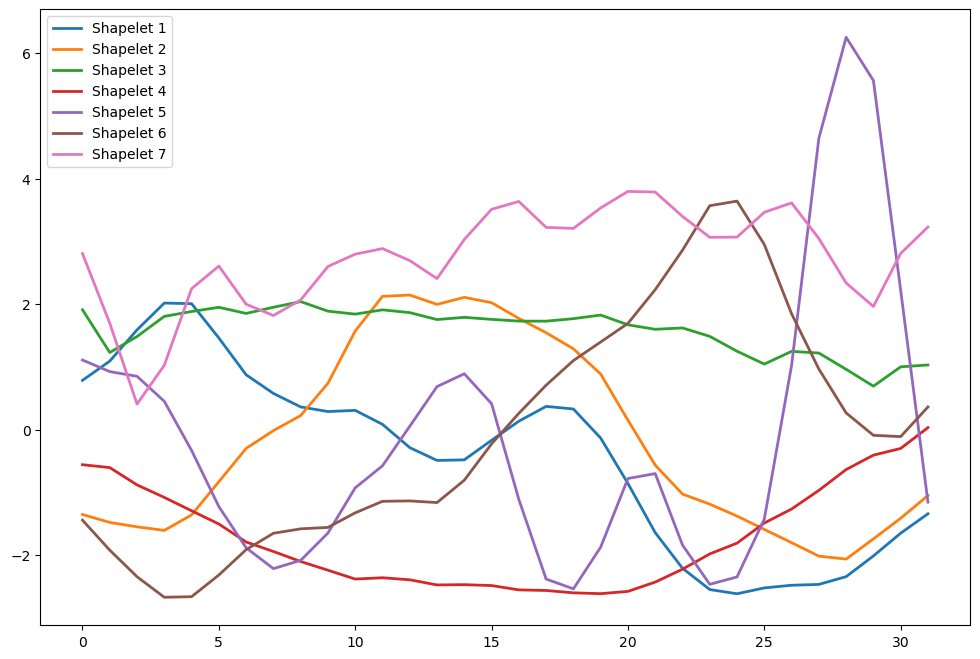

In [164]:
# Voglio visualizzare gli shapelets che sono venuti fuori 
shapelets = shp_clf.shapelets_
shapelets

# Visualize the shapelets
plt.figure(figsize=(12, 8))

# Plot each shapelet
for i, shapelet in enumerate(shapelets):
    plt.plot(shapelet.ravel(), label=f"Shapelet {i+1}", linewidth=2)

plt.legend()
#plt.title("7 Shapelets con lunghezza pari a 37")
plt.show()

In [165]:
#Utilizziamo gli shapelets addestrati per predire le etichette delle serie temporali nel test set
y_pred = shp_clf.predict(X_test)

8/8 [==============================] - 0s 9ms/step


In [166]:
# osserviamo ora i risultati
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))

Accuracy 0.132
F1-score 0.09054210586841449
                   precision    recall  f1-score   support

              emo       0.00      0.00      0.00       100
             folk       0.00      0.00      0.00       100
             goth       0.00      0.00      0.00       100
            happy       0.12      0.08      0.10       100
      heavy-metal       0.00      0.00      0.00       100
       honky-tonk       0.23      0.07      0.11       100
           j-idol       0.07      0.03      0.04       100
             kids       0.10      0.15      0.12       100
   minimal-techno       0.24      0.69      0.35       100
              mpb       0.33      0.01      0.02       100
          new-age       0.17      0.51      0.26       100
            opera       0.10      0.09      0.09       100
            piano       0.14      0.03      0.05       100
progressive-house       0.16      0.17      0.16       100
            salsa       0.05      0.01      0.02       100
        ser

c:\Users\HUAWEI\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HUAWEI\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HUAWEI\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


8/8 [==============================] - 0s 9ms/step


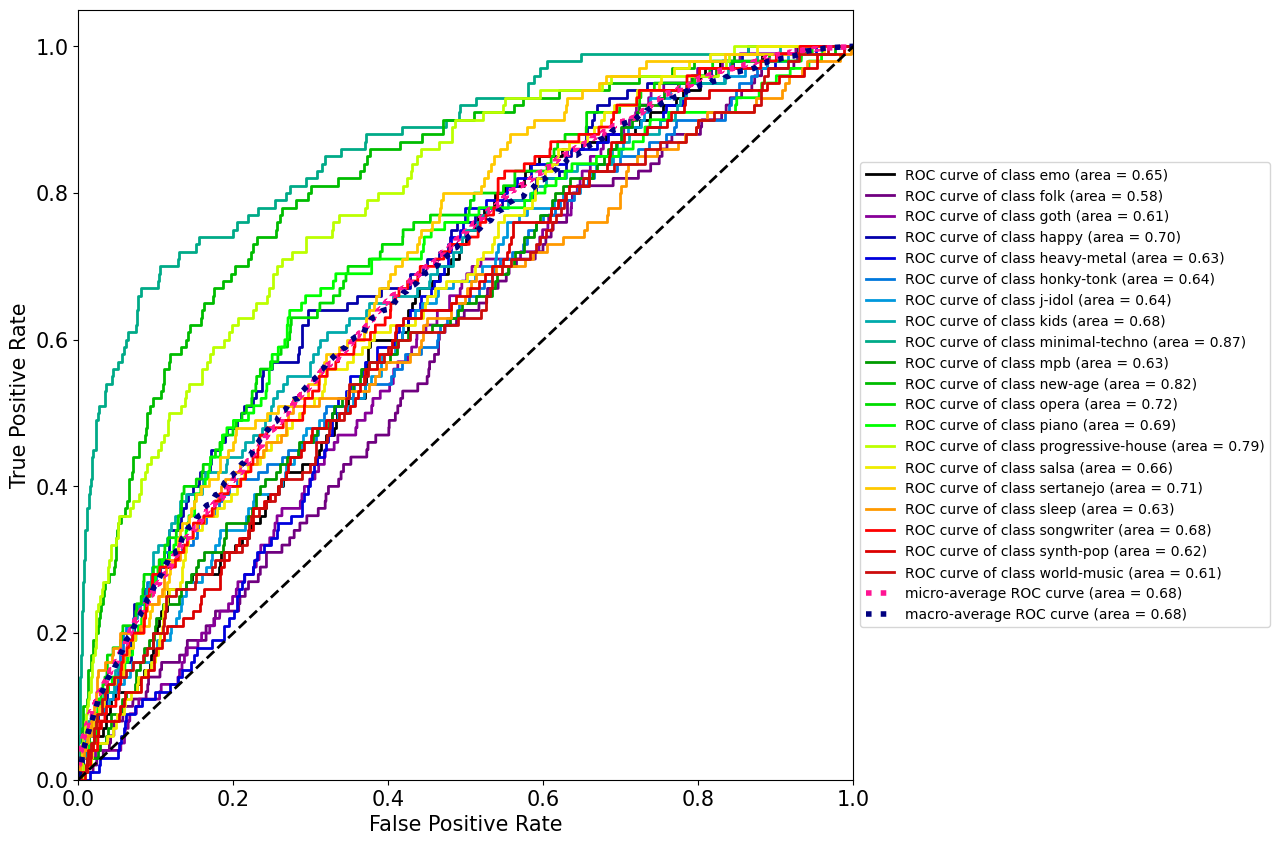

array([[ 0,  0,  0,  3,  0,  2,  4,  8,  5,  0,  7,  4,  1,  7,  2, 38,
         2,  3,  6,  8],
       [ 2,  0,  0,  2,  0,  1,  1,  9,  9,  0, 13,  7,  1,  3,  1, 24,
         6,  6,  6,  9],
       [ 2,  0,  0,  5,  0,  1,  6,  5, 12,  0,  9,  4,  0,  1,  2, 28,
         5,  4,  9,  7],
       [ 2,  0,  0,  8,  1,  0,  1,  8, 22,  1, 20,  4,  1, 14,  0,  2,
         8,  0,  2,  6],
       [ 3,  0,  0, 10,  0,  1,  3,  9, 10,  0,  4,  3,  0,  4,  1, 26,
         5,  5,  5, 11],
       [ 1,  0,  0,  6,  0,  7,  1,  5, 10,  0, 12,  5,  0,  4,  1, 27,
         6,  6,  3,  6],
       [ 1,  0,  0,  4,  0,  4,  3,  8,  3,  0,  9,  6,  2,  4,  4, 15,
        14,  2,  5, 16],
       [ 1,  0,  0,  4,  0,  0,  3, 15, 15,  1,  2,  1,  2,  4,  0, 36,
         2,  2,  6,  6],
       [ 0,  0,  0,  1,  0,  1,  0, 10, 69,  0,  4,  1,  0,  6,  0,  4,
         4,  0,  0,  0],
       [ 1,  0,  0,  2,  0,  2,  3,  7, 10,  1,  7,  4,  0,  7,  1, 38,
         6,  1,  2,  8],
       [ 2,  0,  0,  3,  0,  0

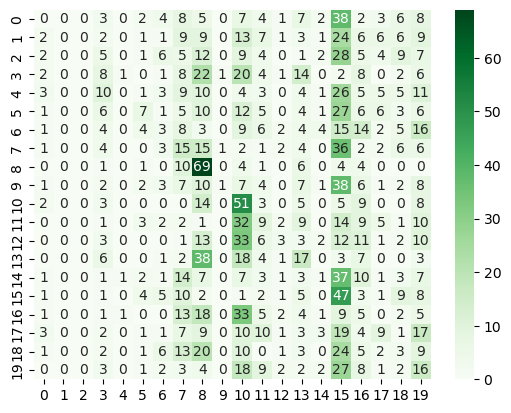

In [167]:
# ROC Curve
y_score_shp_clf = shp_clf.predict_proba(X_test)

plot_roc(y_test, y_score_shp_clf, figsize=(10,10), title_fontsize=15, text_fontsize=15)
plt.title("")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

#confusion matrix
cm_shp_cls = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_shp_cls, annot=True, cmap="Greens")
cm_shp_cls

RISULTATI: anche qui fanno abbastanza schifo perchè classifica solamente come emozione "sad" e le altre non le considera neanche, infatti i risultati sono uguali, giusto roc curve è forse un pochino migliore

In [168]:
# Voglio visualizzare gli shapelets che sono venuti fuori 
shapelets = shp_clf.shapelets_
shapelets

array([array([[ 0.78653073],
              [ 1.09278941],
              [ 1.59091759],
              [ 2.01831985],
              [ 2.00833631],
              [ 1.46163118],
              [ 0.87515146],
              [ 0.57796097],
              [ 0.36290869],
              [ 0.28899997],
              [ 0.30804637],
              [ 0.08531164],
              [-0.28590435],
              [-0.49023587],
              [-0.48075923],
              [-0.16866651],
              [ 0.13531022],
              [ 0.37106851],
              [ 0.32976779],
              [-0.13384184],
              [-0.8577525 ],
              [-1.64105332],
              [-2.20870781],
              [-2.54820776],
              [-2.61573267],
              [-2.52215624],
              [-2.47977901],
              [-2.46662331],
              [-2.34297466],
              [-2.01260567],
              [-1.64997685],
              [-1.34071648]]), array([[-1.35200024],
                                      [-1.478391

In [169]:
locator_model = shp_clf.locator_model_
locator_model

In [170]:
# Ottenere le predizioni sugli indici degli shapelets
shapelet_indices = locator_model.predict(X_test)
shapelet_indices.shape, shapelet_indices

# shapelet_indices conterrà gli indici degli shapelets per ogni serie temporale in X_test
# shapelet_indices avrà le dimensioni (n_timeseries, n_shapelets)


63/63 [==============================] - 0s 3ms/step


((2000, 7),
 array([[119., 190., 278., ..., 212., 218., 273.],
        [241.,  17., 146., ..., 270.,  46., 142.],
        [122., 190.,  60., ..., 128.,  38.,  55.],
        ...,
        [ 49.,  37., 274., ..., 183.,  27., 269.],
        [ 47., 133., 125., ..., 176.,  26., 126.],
        [ 57., 161., 234., ..., 100., 154., 227.]], dtype=float32))

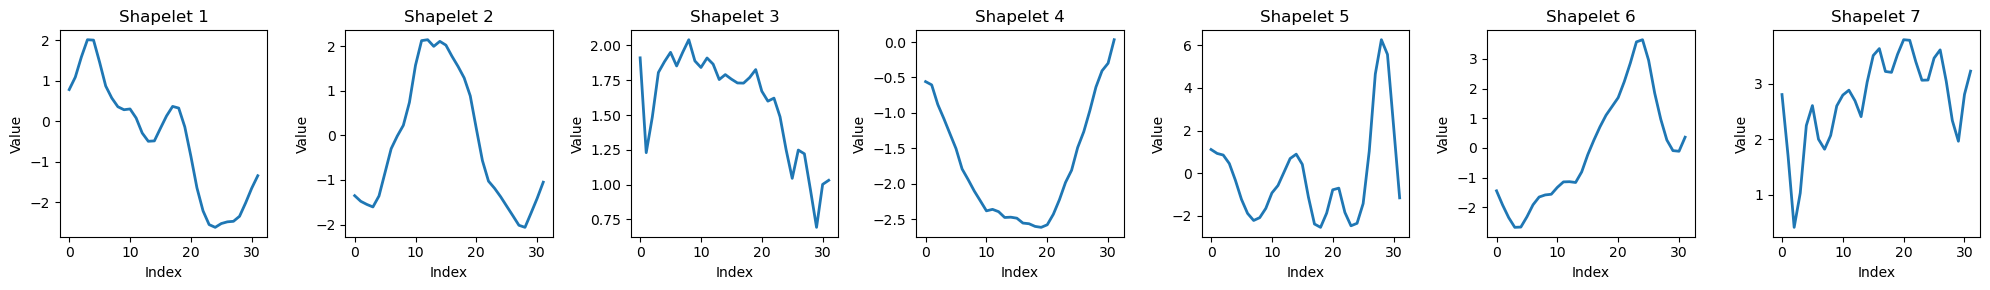

In [171]:
import matplotlib.pyplot as plt

# shapelets estratti dal modello
shapelets = shp_clf.shapelets_

# Numero di shapelets
num_shapelets = len(shapelets)

# Numero di righe e colonne per disporre i grafici
num_rows = 1
num_cols = num_shapelets

# Dimensione del grafico
plt.figure(figsize=(20, 3))

# Ciclo su ogni shapelet e lo disegna
for i, shapelet in enumerate(shapelets):
    plt.subplot(num_rows, num_cols, i+1)
    plt.plot(shapelet.ravel(), linewidth=2)
    plt.title(f"Shapelet {i+1}")
    plt.xlabel("Index")
    plt.ylabel("Value")

plt.tight_layout()
plt.show()


[[ 0.78653073]
 [ 1.09278941]
 [ 1.59091759]
 [ 2.01831985]
 [ 2.00833631]
 [ 1.46163118]
 [ 0.87515146]
 [ 0.57796097]
 [ 0.36290869]
 [ 0.28899997]
 [ 0.30804637]
 [ 0.08531164]
 [-0.28590435]
 [-0.49023587]
 [-0.48075923]
 [-0.16866651]
 [ 0.13531022]
 [ 0.37106851]
 [ 0.32976779]
 [-0.13384184]
 [-0.8577525 ]
 [-1.64105332]
 [-2.20870781]
 [-2.54820776]
 [-2.61573267]
 [-2.52215624]
 [-2.47977901]
 [-2.46662331]
 [-2.34297466]
 [-2.01260567]
 [-1.64997685]
 [-1.34071648]]
FINE SHAPELET_1 


[[-1.35200024]
 [-1.47839153]
 [-1.54856288]
 [-1.60532916]
 [-1.35860646]
 [-0.82970554]
 [-0.29847762]
 [-0.01568099]
 [ 0.22533858]
 [ 0.73996586]
 [ 1.5727278 ]
 [ 2.12532759]
 [ 2.14602733]
 [ 1.99738371]
 [ 2.10934496]
 [ 2.02410507]
 [ 1.77332246]
 [ 1.54509211]
 [ 1.2892344 ]
 [ 0.88644344]
 [ 0.15080805]
 [-0.56493521]
 [-1.02656162]
 [-1.18700576]
 [-1.37706578]
 [-1.5896498 ]
 [-1.80085087]
 [-2.01601243]
 [-2.0625701 ]
 [-1.74046159]
 [-1.41191959]
 [-1.04962575]]
FINE SHAPELET_2 




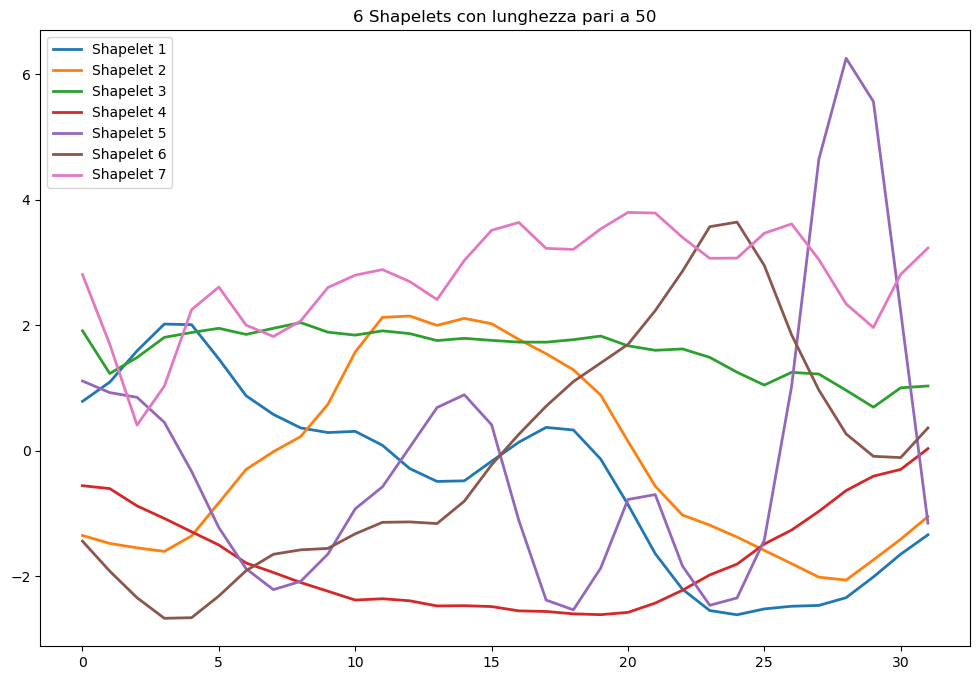

In [172]:
# Visualize the shapelets
plt.figure(figsize=(12, 8))

# Plot each shapelet
for i, shapelet in enumerate(shapelets):
    plt.plot(shapelet.ravel(), label=f"Shapelet {i+1}", linewidth=2)
    print(shapelet)
    print(f"FINE SHAPELET_{i+1} \n\n")
plt.legend()
plt.title("6 Shapelets con lunghezza pari a 50")
plt.show()

### 3. Shapelets Distances-Based Classifier

In [173]:
#trasformo in shapelets il dataset di time series - TRAIN
X_train2 = shp_clf.transform(X_train)
X_train2.shape, X_train2

32/32 [==============================] - 0s 9ms/step


((8000, 7),
 array([[1.1757534 , 1.3726351 , 1.2970734 , ..., 3.201673  , 2.082514  ,
         5.292077  ],
        [1.319533  , 0.66754866, 1.4846982 , ..., 3.1669617 , 0.9347305 ,
         5.972725  ],
        [1.9976015 , 1.5551242 , 2.6791646 , ..., 3.182436  , 2.0466878 ,
         6.0891166 ],
        ...,
        [1.2305106 , 1.6331701 , 1.3650689 , ..., 2.967254  , 1.7001686 ,
         4.914837  ],
        [1.1666981 , 0.9867879 , 0.95084   , ..., 3.721044  , 1.7356646 ,
         3.9515777 ],
        [0.65800333, 1.0937469 , 1.2371721 , ..., 2.4557729 , 1.6291094 ,
         4.247265  ]], dtype=float32))

In [174]:
#trasformo in shapelets il dataset di time series - TEST
X_test2 = shp_clf.transform(X_test)
X_test2.shape, X_test2

8/8 [==============================] - 0s 8ms/step


((2000, 7),
 array([[0.98153424, 1.2604812 , 1.1123712 , ..., 3.222572  , 1.792124  ,
         4.410737  ],
        [1.9800438 , 2.0194001 , 2.5129848 , ..., 3.8000555 , 3.1784372 ,
         6.681864  ],
        [1.1023563 , 1.3678875 , 1.0458307 , ..., 2.935433  , 1.8262668 ,
         1.6869297 ],
        ...,
        [2.1646247 , 1.5280992 , 0.48780465, ..., 3.7808585 , 1.769172  ,
         3.5911627 ],
        [1.1288228 , 0.49728322, 2.5214047 , ..., 2.1226757 , 1.890434  ,
         6.3568907 ],
        [0.9601958 , 0.5330746 , 1.2909327 , ..., 2.75175   , 1.4059372 ,
         5.3201885 ]], dtype=float32))

KNN

Qui utilizzo gli shapelets che ho trovato prima per valutare le prestazioni del modello di classificazione attraverso un KNN




In [175]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier

#Facciamo una randomized search with 5-cross fold validation - caso knn con distanza manhattan/euclidea (che viene scelta nella cross validation)
param_dist = {
    'n_neighbors': (1, 3, 5, 7, 9, 10, 15, 30, 50),  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'p': [1, 2],  # Power parameter for the Minkowski metric (1: Manhattan distance, 2: Euclidean distance)
}

knn=KNeighborsClassifier()
random_search = RandomizedSearchCV(knn, param_distributions=param_dist, n_iter=10, cv=5, random_state=42)
random_search.fit(X_train2, y_train)
random_search.best_params_


{'weights': 'distance', 'p': 2, 'n_neighbors': 30}

In [177]:
from sklearn.neighbors import KNeighborsClassifier
# clf = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='euclidean') -->base di guidotti 
clf = KNeighborsClassifier(n_neighbors=30, weights='distance', p=2,  metric='euclidean', n_jobs=-1) # --> quello che viene fuori dalla randomized_search()
clf.fit(X_train2, y_train)

y_pred = clf.predict(X_test2)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))

Accuracy 0.156
F1-score 0.1526221584784495
                   precision    recall  f1-score   support

              emo       0.06      0.05      0.05       100
             folk       0.14      0.11      0.12       100
             goth       0.04      0.03      0.03       100
            happy       0.21      0.23      0.22       100
      heavy-metal       0.05      0.04      0.04       100
       honky-tonk       0.17      0.16      0.16       100
           j-idol       0.10      0.13      0.11       100
             kids       0.10      0.10      0.10       100
   minimal-techno       0.60      0.51      0.55       100
              mpb       0.09      0.09      0.09       100
          new-age       0.16      0.29      0.21       100
            opera       0.14      0.07      0.09       100
            piano       0.14      0.13      0.13       100
progressive-house       0.21      0.16      0.18       100
            salsa       0.12      0.15      0.14       100
        sert

8/8 [==============================] - 0s 9ms/step


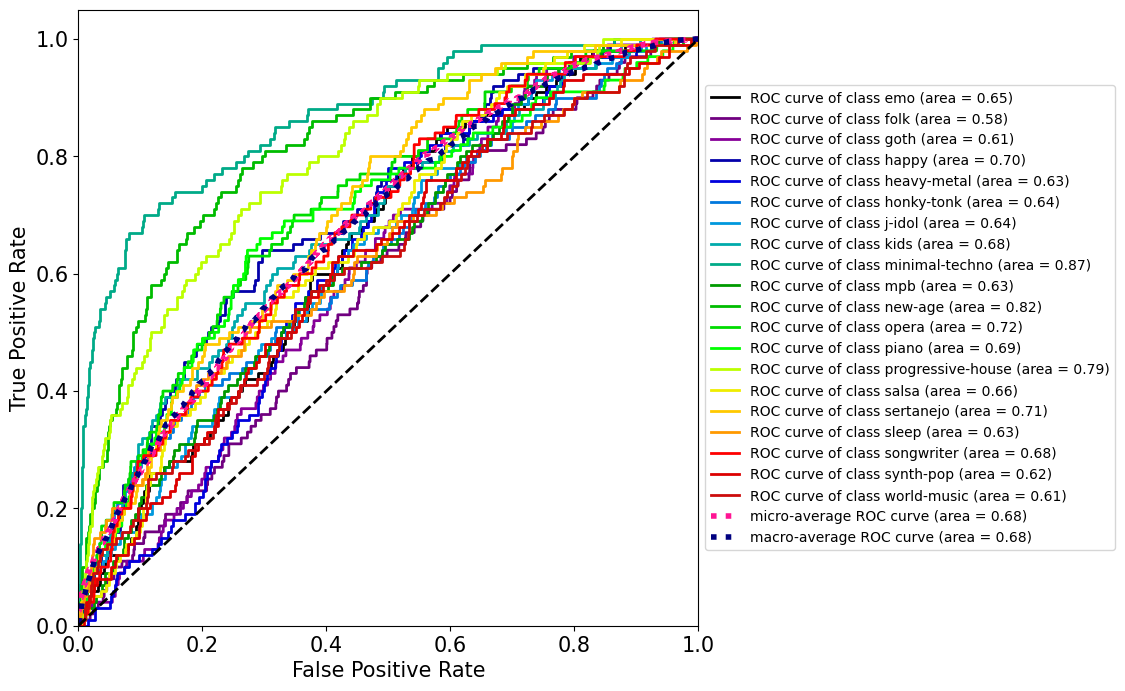

In [178]:
y_score_shp_clf = shp_clf.predict_proba(X_test)

plot_roc(y_test, y_score_shp_clf, figsize=(8,8), title_fontsize=15, text_fontsize=15)
plt.title("")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

array([[ 5,  4,  8,  3,  7,  9,  3,  9,  1,  4,  2,  1,  5,  4,  6, 14,
         3,  5,  3,  4],
       [ 5, 11,  1,  2,  2,  4,  3, 11,  0,  3,  7,  1,  5,  2,  5, 10,
         4, 14,  4,  6],
       [ 2,  1,  3,  2,  6,  6, 10,  9,  0,  7,  2,  7,  5,  0,  7, 13,
         6,  5,  5,  4],
       [ 3,  1,  2, 23,  5,  1,  3,  1,  8,  1, 14,  2,  2,  8,  4,  2,
         2,  3,  8,  7],
       [ 5,  3,  5,  8,  4,  4, 10,  4,  1,  7,  2,  2,  1,  2, 10, 10,
         4,  5,  6,  7],
       [ 1,  5,  7,  6,  5, 16,  7,  3,  0,  4,  5,  4,  4,  3, 11,  7,
         5,  3,  3,  1],
       [ 6,  7,  7,  3,  8,  5, 13,  7,  0,  7,  3,  3,  7,  2,  9,  3,
         2,  2,  1,  5],
       [10,  1,  3,  3,  5,  2,  4, 10,  2,  3,  3,  0,  2,  4,  7, 17,
         2,  6, 13,  3],
       [ 3,  1,  2, 12,  2,  3,  2,  1, 51,  2,  1,  1,  3,  7,  1,  1,
         6,  1,  0,  0],
       [ 8,  4,  6,  1,  5,  5,  7,  4,  1,  9,  4,  2,  4,  1,  6, 16,
         1,  4,  5,  7],
       [ 1,  3,  0,  6,  3,  0

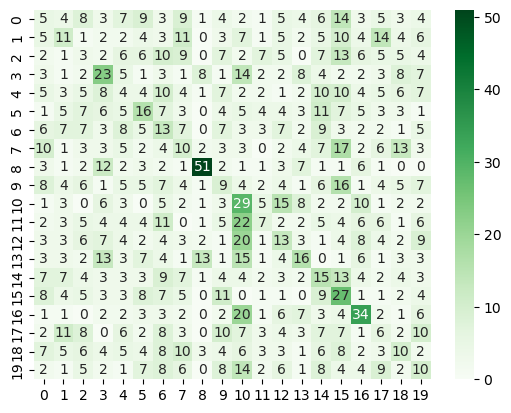

In [179]:
#confusion matrix
cm_shp_cls = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_shp_cls, annot=True, cmap="Greens")
cm_shp_cls

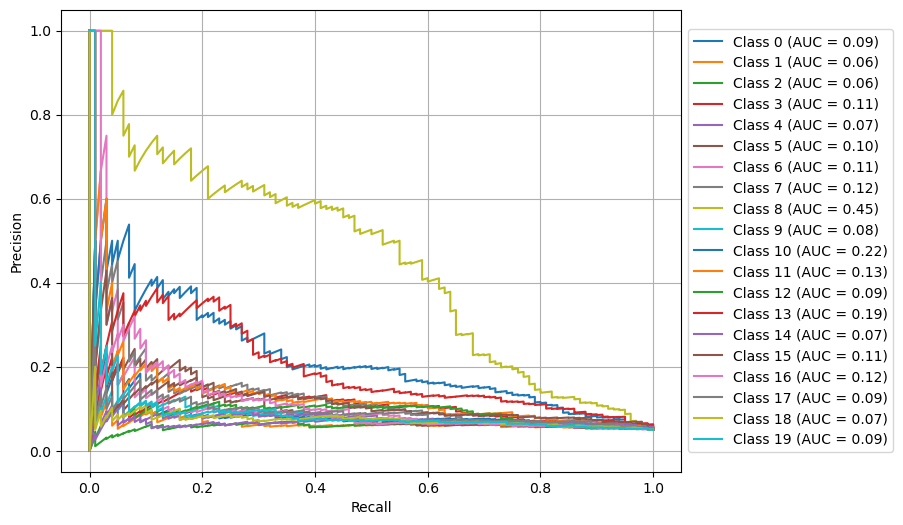

In [136]:
# Binarize the labels
y_test_binarized = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_binarized.shape[1]

# Compute precision and recall for each class
precision = dict()
recall = dict()
thresholds = dict()
auc_score = dict()

for i in range(n_classes):
    precision[i], recall[i], thresholds[i] = precision_recall_curve(y_test_binarized[:, i], y_score_shp_clf[:, i])
    auc_score[i] = auc(recall[i], precision[i])

# Plot precision-recall curve for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(recall[i], precision[i], label=f'Class {i} (AUC = {auc_score[i]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
#plt.title('Precision-Recall Curve for Multiclass Classification')
#plt.legend(loc='lower left')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()

DECISION TREE

Qui utilizzo gli shapelets che ho trovato prima per valutare le prestazioni del modello di classificazione attraverso un Decision Tree

In [180]:
# Definisci la griglia dei parametri che vuoi testare
from random import randint
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [6, 8, 10, 12, 14, 16, 18, 20],  # Specifica l'intervallo degli iperparametri numerici
}

# Esegui la ricerca randomizzata
random_search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=10, cv=5, random_state=42)
random_search.fit(X_train2, y_train)
random_search.best_params_

{'max_depth': 6, 'criterion': 'entropy'}

In [182]:
from sklearn.tree import DecisionTreeClassifier

#clf = DecisionTreeClassifier(max_depth=8, random_state=42) # --> default di Guidotti
clf = DecisionTreeClassifier(max_depth= 6, criterion='entropy',random_state=42) # --> parametri della randomized_search()
clf.fit(X_train2, y_train)

y_pred = clf.predict(X_test2)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))

Accuracy 0.1265
F1-score 0.09829881129380819
                   precision    recall  f1-score   support

              emo       0.11      0.05      0.07       100
             folk       0.00      0.00      0.00       100
             goth       0.00      0.00      0.00       100
            happy       0.12      0.19      0.15       100
      heavy-metal       0.08      0.11      0.09       100
       honky-tonk       0.12      0.05      0.07       100
           j-idol       0.07      0.26      0.11       100
             kids       0.14      0.10      0.12       100
   minimal-techno       0.43      0.46      0.44       100
              mpb       0.00      0.00      0.00       100
          new-age       0.22      0.42      0.29       100
            opera       0.09      0.09      0.09       100
            piano       0.07      0.03      0.04       100
progressive-house       0.10      0.07      0.08       100
            salsa       0.00      0.00      0.00       100
        se

c:\Users\HUAWEI\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HUAWEI\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HUAWEI\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


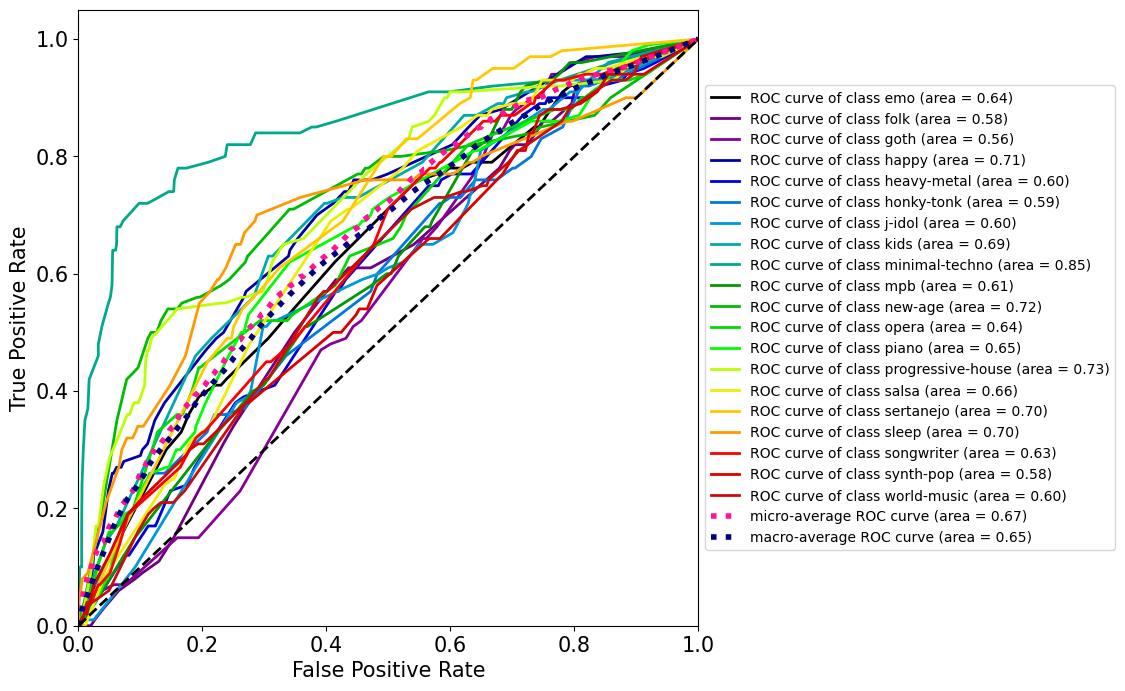

In [183]:
y_score_shp_clf = clf.predict_proba(X_test2)

plot_roc(y_test, y_score_shp_clf, figsize=(8,8), title_fontsize=15, text_fontsize=15)
plt.title("")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

array([[ 5,  0,  0,  1,  7,  5, 18,  6,  2,  0,  2,  5,  1,  3,  0, 36,
         2,  0,  0,  7],
       [ 5,  0,  0,  6,  4,  2, 26,  3,  0,  0,  3,  6,  4,  2,  0, 28,
         2,  0,  1,  8],
       [ 0,  0,  0,  1,  8,  2, 25,  7,  2,  0,  2,  5,  1,  4,  0, 32,
         6,  0,  0,  5],
       [ 2,  0,  0, 19,  6,  0, 17,  1, 12,  0, 14,  4,  3,  8,  0, 10,
         2,  0,  0,  2],
       [ 1,  0,  0, 11, 11,  1, 30,  6,  2,  0,  2,  2,  0,  2,  0, 26,
         1,  0,  0,  5],
       [ 0,  0,  0,  7,  9,  5, 23,  0,  1,  0, 12,  1,  3,  4,  0, 28,
         2,  0,  1,  4],
       [ 1,  0,  0,  2, 11,  2, 26,  3,  1,  0,  6,  7,  5,  2,  0, 13,
         5,  0,  1, 15],
       [ 4,  0,  0,  5,  7,  0, 17, 10,  1,  0,  0,  2,  0,  4,  0, 38,
         8,  0,  0,  4],
       [ 3,  0,  1, 25,  1,  1,  1,  0, 46,  0,  5,  1,  1,  4,  0,  7,
         2,  0,  0,  2],
       [ 1,  0,  0,  3, 12,  3, 20,  5,  1,  0,  1,  5,  1,  2,  0, 33,
         3,  0,  0, 10],
       [ 1,  0,  0,  9,  1,  0

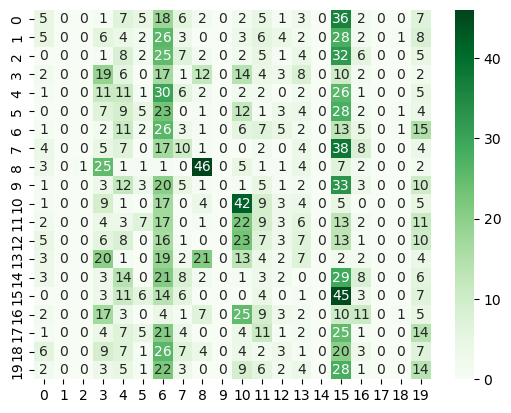

In [184]:
#confusion matrix
cm_shp_cls = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_shp_cls, annot=True, cmap="Greens")
cm_shp_cls

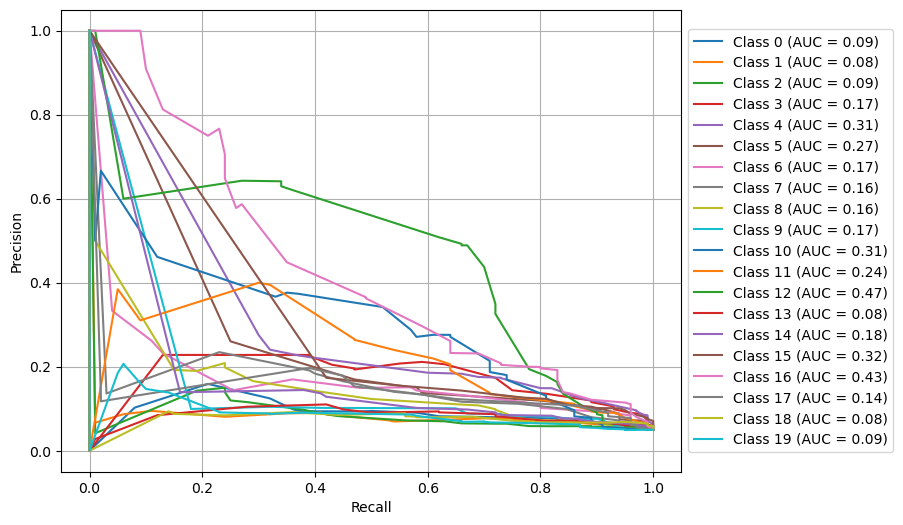

In [56]:
# Binarize the labels
y_test_binarized = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_binarized.shape[1]

# Compute precision and recall for each class
precision = dict()
recall = dict()
thresholds = dict()
auc_score = dict()

for i in range(n_classes):
    precision[i], recall[i], thresholds[i] = precision_recall_curve(y_test_binarized[:, i], y_score_shp_clf[:, i])
    auc_score[i] = auc(recall[i], precision[i])

# Plot precision-recall curve for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(recall[i], precision[i], label=f'Class {i} (AUC = {auc_score[i]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
#plt.title('Precision-Recall Curve for Multiclass Classification')
#plt.legend(loc='lower left')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()

CONCLUSIONI: nessuno dei seguenti classificatori è comunque buono perchè le prestazioni non sono il massimo. 